# TLL SAXS - Neofaunus version
*C. Pasquier and S. Hervø-Hansen, Division of Theoretical Chemistry, Lund University, 2017*


### System Requirements
This Jupyter Notebook was originally run on Ubuntu 14.04 with `Python 3.5.2`, `matplotlib`, `numpy` within the Anaconda environment.

## Import modules

In [1]:
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json
import math
from math import sqrt
plt.rcParams.update({'font.size': 18, 'figure.figsize': [12.0, 8.0]})
workdir='/lunarc/nobackup/users/coralie/neofaunus/mc'
print(workdir)

/lunarc/nobackup/users/coralie/neofaunus/mc


In [3]:
%cd $workdir

def mkinput():
    mk = {
        "energy" : [
            {"nonbonded_coulomblj_EM":{"openmp":["g2g"], "cutoff_g2g":cut_g2g, 
                                    "coulomb":{"epsr":78.7, "type":"yukawa", "debyelength":debyelength, "cutoff":cut_i2i},
                                    "lennardjones":{"mixing":"LB", 
                                                    "custom":{
                                                        "BALA BALA" : { "sigma":hsigma, "eps":heps }, 
                                                        "BALA BILE" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BLEU" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BTRP" : { "sigma":hsigma, "eps":heps },     
                                                        "BILE BILE" : { "sigma":hsigma, "eps":heps }, 
                                                        "BILE BLEU" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BVAL" : { "sigma":hsigma, "eps":heps }, 
                                                        "BILE BTRP" : { "sigma":hsigma, "eps":heps },           
                                                        "BLEU BLEU" : { "sigma":hsigma, "eps":heps }, 
                                                        "BLEU BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BTRP" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPHE BPHE" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPHE BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BPHE BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BPHE BTRP" : { "sigma":hsigma, "eps":heps },       
                                                        "BPRO BPRO" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPRO BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BPRO BTRP" : { "sigma":hsigma, "eps":heps },   
                                                        "BTRP BTRP" : { "sigma":hsigma, "eps":heps },
                                                        "BTRP BVAL" : { "sigma":hsigma, "eps":heps },       
                                                        "BVAL BVAL" : { "sigma":hsigma, "eps":heps }
                                                    }
                                                   }
                                    }
            }
        ],      
        "atomlist" : [
            {"H3PO4":  { "eps":epslj, "q":0, "r":2.0 }},
            {"H2PO4":  { "eps":epslj, "q":-1, "r":2.0 }},
            {"HPO4" :  { "eps":epslj, "q":-2, "r":2.0 }},
            {"PO4"  :  { "eps":epslj, "q":-3, "r":2.0 }},
            {"BPTI" :  { "eps":epslj, "q":7.3, "r":12.29 }},
            {"Na"   :  { "eps":epslj, "q": 1, "r":1.9, "mw":22.99 }},
            {"Cl"   :  { "eps":epslj, "q":-1, "r":1.7, "mw":35.45 }},
            {"I"    :  { "eps":epslj, "q":-1, "r":2.0, "mw":1 }},
            {"SCN"  :  { "eps":epslj, "q":-1, "r":2.0, "mw":1 }},
            {"ASP"  :  { "eps":epslj, "q":-1, "r":3.6, "mw":110 }},
            {"CTR"  :  { "eps":epslj, "q":-1, "r":2.0, "mw":16 }},
            {"GLU"  :  { "eps":epslj, "q":-1, "r":3.8, "mw":122 }},
            {"HIS"  :  { "eps":epslj, "q":0.5,  "r":3.9, "mw":130 }},
            {"SHIS"  :  { "eps":epslj, "q":0.5,  "r":3.9, "mw":130 }},
            {"LSHIS"  :  { "eps":epslj, "q":0,  "r":3.9, "mw":130 }},
            {"NTR"  :  { "eps":epslj, "q":1,  "r":2.0, "mw":14 }},
            {"SNTR"  :  { "eps":epslj, "q":1,  "r":2.0, "mw":14 }},
            {"LSNTR"  :  { "eps":epslj, "q":0,  "r":2.0, "mw":14 }},
            {"TYR"  :  { "eps":epslj, "q":0, "r":4.1, "mw":154 }},
            {"LYS"  :  { "eps":epslj, "q":1,  "r":3.7, "mw":116 }},
            {"SLYS" :  { "eps":epslj, "q":1,  "r":3.7, "mw":116 }},
            {"LSLYS" :  { "eps":epslj, "q":0,  "r":3.7, "mw":116 }},
            {"CYS"  :  { "eps":epslj, "q":-1, "r":3.6, "mw":103 }},
            {"CYT"  :  { "eps":epslj, "q":0, "r":3.6, "mw":103 }},
            {"ARG"  :  { "eps":epslj, "q":1,  "r":4.0, "mw":144 }},
            {"SARG" :  { "eps":epslj, "q":1,  "r":4.0, "mw":144 }},
            {"LSARG" :  { "eps":epslj, "q":0,  "r":4.0, "mw":144 }},
            {"ALA"  :  { "eps":epslj, "q":0,  "r":3.1, "mw":66 }},
            {"BALA" :  { "eps":epslj, "q":0,  "r":3.1, "mw":66 }},
            {"LBALA" :  { "eps":epslj, "q":-1,  "r":3.1, "mw":66 }},
            {"ILE"  :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"BILE" :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"LBILE" :  { "eps":epslj, "q":-1,  "r":3.6, "mw":102 }},
            {"LEU"  :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"BLEU" :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"LBLEU" :  { "eps":epslj, "q":-1,  "r":3.6, "mw":102 }},
            {"MET"  :  { "eps":epslj, "q":0,  "r":3.8, "mw":122 }},
            {"PHE"  :  { "eps":epslj, "q":0,  "r":3.9, "mw":138 }},
            {"BPHE" :  { "eps":epslj, "q":0,  "r":3.9, "mw":138 }},
            {"LBPHE" :  { "eps":epslj, "q":-1,  "r":3.9, "mw":138 }},
            {"PRO"  :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"BPRO" :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"LBPRO" :  { "eps":epslj, "q":-1,  "r":3.4, "mw":90 }},
            {"TRP"  :  { "eps":epslj, "q":0,  "r":4.3, "mw":176 }},
            {"BTRP" :  { "eps":epslj, "q":0,  "r":4.3, "mw":176 }},
            {"LBTRP" :  { "eps":epslj, "q":-1,  "r":4.3, "mw":176 }},
            {"VAL"  :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"BVAL" :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"LBVAL" :  { "eps":epslj, "q":-1,  "r":3.4, "mw":90 }},
            {"SER"  :  { "eps":epslj, "q":0,  "r":3.3, "mw":82 }},
            {"THR"  :  { "eps":epslj, "q":0,  "r":3.5, "mw":94 }},
            {"ASN"  :  { "eps":epslj, "q":0,  "r":3.6, "mw":108 }},
            {"GLN"  :  { "eps":epslj, "q":0,  "r":3.8, "mw":120 }},
            {"GLY"  :  { "eps":epslj, "q":0,  "r":2.9, "mw":54 }},
            {"CM"   :  { "eps":epslj, "q":0,  "r":0.01, "mw":10000 }},
            {"SP"   :  { "eps":epslj, "q":3,  "r":1.00, "mw":10000 }},
            {"MAN"  :  { "eps":epsmn, "q":0,  "r":2.9, "mw":108 }},
            {"MAP"  :  { "eps":epsmn, "q":0,  "r":5.8, "mw":108 }},
            {"MAQ"  :  { "eps":epsmn, "q":0,  "r":8.7, "mw":108 }},
            {"MAR"  :  { "eps":epsmn, "q":0,  "r":20.0, "mw":108 }}
        ],  
        "moleculelist": [
            {"protein1": { "rigid":True, "keepcharges":True, "structure":macromolecule1 }},
            {"protein2": { "rigid":True, "keepcharges":True, "structure":macromolecule2 }}
        ],
        "insertmolecules": [
            {"protein1" : { "N":Np1 }},
            {"protein2" : { "N":Np2 }}
        ],
        "moves":[
            {"moltransrot":{"molecule":"protein1", "dp":100, "dprot":3, "repeat":"N"}},
            {"moltransrot":{"molecule":"protein1", "dp":10, "dprot":1, "repeat":"N"}},
            {"cluster":{"molecules":["protein1","protein2"], "dp":100, "dprot":3, "threshold":2*28+6}},
            {"moltransrot":{"molecule":"protein2", "dp":100, "dprot":3, "repeat":"N"}},
            {"moltransrot":{"molecule":"protein2", "dp":10, "dprot":1, "repeat":"N"}}
        ],
        "analysis":[
            {"sanity":{"nstep":100}},
            {"systemenergy":{"file":"energy.dat", "nstep":100}},   
            {"molrdf":{"file":"rdf.dat", "nstep":100, "dr":0.5, "name1":"protein1", "name2":"protein2"}},
            {"scatter":{"dq":0.001, "file":"debye.dat", "molecules":["protein1","protein2"], "nstep":20, "qmax":0.5,
                      "qmin":0.005, "com":True}},
            {"xtcfile":{"file":"traj.xtc", "nstep":1000}},
            {"savestate":{"file":"confout.pqr"}},
            {"savestate":{"file":"state.json"}}      
        ],
        "temperature":298.15,
        "random":{"seed":"default"},
        "geometry":{"type":"cuboid", "length":[boxlen, boxlen, boxlen]},
        "mcloop":{"macro":10, "micro":micro}
    }
    with open('tll.json', 'w+') as f:
        f.write(json.dumps(mk, indent=4))
    
     
Cs = 0.105 
Np1 = 195
Np2 = 130
N_A = 6.02214129*1e+23
pH = 8.0
debyelength = 3.04/Cs**0.5

cut_g2g=5*debyelength+2*28
cut_i2i=5*debyelength

hsigma = 7.0   

# Conversion of epsilons from kT to kJ/mol
def epskt():
    global heps, epslj, epsmn
    kTtokJmol = (1.3806*10**-23)*(6.022*10**23)*298.15/1000
    heps = epsHH_kT*kTtokJmol
    epslj = eps_kT*kTtokJmol
    epsmn = 0.005*kTtokJmol

# Box dimensions
def setboxlen():
    global boxlen
    boxlen = ((((Np1*Mw1/N_A)+(Np2*Mw2/N_A))/Cp)**(1/3))*1e9
               
# Which form?
def seriesdef():
    global conc_range, Mw1, Mw2, macromolecule1, macromolecule2          
    if series=="series4mix":
        conc_range = [5.76, 7.22, 8.01]   #[0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01] 
        Mw1 = 30218.99
        Mw2 = 29609.61
        if structure=="closed":
            macromolecule1 = "../SPIRR-closed-frame200.aam"
            macromolecule2 = "../1du4_closed.aam"
        elif structure=="open":
            macromolecule1 = "../SPIRR-open-frame697.aam"
            macromolecule2 = "../1ein_open.aam"
            
    if series=="series3_R20mix":
        conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73] 
        Mw1 = 31881.54
        Mw2 = 31272.17
        if structure=="closed":
            macromolecule1 = "../SPIRR-closed-frame200_R20.aam"
            macromolecule2 = "../1du4_R20.aam"
        elif structure=="open":
            macromolecule1 = "../SPIRR-open-frame697_R20.aam"
            macromolecule2 = "../1ein_R20.aam"
            
            
# Writes the submit.sh file                                 
def submit_mkinput():   
    global run_arg1, run_arg2
    if runprod==True:
        run_arg1 = '#'
        run_arg2 = ''
    elif runprod==False:
        run_arg1 = ''
        run_arg2 = '#'
    else:
        print('run only takes the argument "prod" or "equil"')
        
    d = """#!/bin/bash
#SBATCH -A snic2019-3-188
#SBATCH -N 1
#SBATCH --tasks-per-node=4
#SBATCH -t 168:00:00

{equil}OMP_NUM_THREADS=4 | time ../../faunus/faunus -i tll.json -o tll.out --nobar
{prod}OMP_NUM_THREADS=4 | time ../../faunus/faunus -i tll.json --state state.json -o tll.out --nobar

"""
    with open('submit.sh', 'w+') as f:
        f.write(d.format(equil=run_arg1, prod=run_arg2))
        f.close()
            
    
# Conditions
series = "series4mix"
structure = "closed"
runprod = True

# Number of loops for equilibration and production runs
micro_eq = 10000        # 10.000=15h
micro_prod = 10000      # Id.
 

for epsHH_kT in [0.61]: 
    for eps_kT in [0.05]:
        epskt()
        seriesdef()
        for Cp in conc_range:
            setboxlen()
            submit_mkinput()
            pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
            if not os.path.isdir(pfx):
                %mkdir -p $pfx
            %cd $pfx
            if (runprod==False):
                print ("\nEquilibration run")
                try:
                    os.remove('state')
                    print ("State file deleted")
                except: pass
                micro=micro_eq
                mkinput()
                !sbatch -J $pfx -o eq -e stderr ../submit.sh   
                %cd ..  
            if (runprod==True):
                print ("\nProduction run")
                %cp debye.dat debye_eq.dat
                %cp energy.dat energy_eq.dat
                micro=micro_prod
                mkinput()
                !sbatch -J $pfx -o out -e stderr ../submit.sh
                %cd ..
            

/lunarc/nobackup/users/coralie/neofaunus/mc
/lunarc/nobackup/users/coralie/neofaunus/mc/series4mix-closed-h0.61-e0.05-C5.76

Production run
Submitted batch job 3058301
/lunarc/nobackup/users/coralie/neofaunus/mc
/lunarc/nobackup/users/coralie/neofaunus/mc/series4mix-closed-h0.61-e0.05-C7.22

Production run
Submitted batch job 3058302
/lunarc/nobackup/users/coralie/neofaunus/mc
/lunarc/nobackup/users/coralie/neofaunus/mc/series4mix-closed-h0.61-e0.05-C8.01

Production run
Submitted batch job 3058303
/lunarc/nobackup/users/coralie/neofaunus/mc


## Energy checking

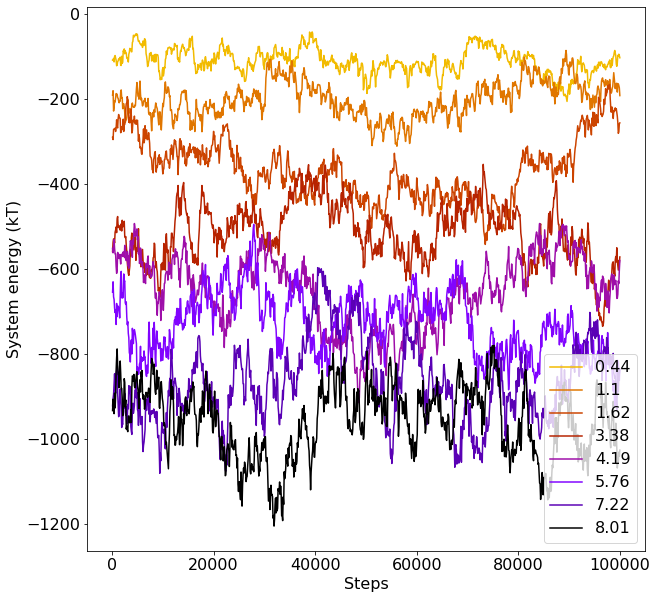

In [18]:
%cd -q $workdir
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))

series = "series4mix"
structure = "open"


if series=="series4mix":
    conc_range = [0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01] 
    Mw1 = 30218.99
    Mw2 = 29609.61
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200.aam"
        macromolecule2 = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697.aam"
        macromolecule2 = "../1ein_open.aam"

if series=="series3_R20mix":
    conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73] 
    Mw1 = 31881.54
    Mw2 = 31272.17
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200_R20.aam"
        macromolecule2 = "../1du4_R20.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697_R20.aam"
        macromolecule2 = "../1ein_R20.aam" 



for epsHH_kT in [0.485]: 
    for eps_kT in [0.005]:
        for Cp in conc_range:
            pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
            %cd -q $pfx
            t,e = np.loadtxt("energy.dat",usecols=(0,1),unpack=True)
            plt.plot(t,e,label=str(Cp))
            plt.xlabel("Steps")
            plt.ylabel("System energy (kT)")
            plt.legend()
                        
            %cd -q '..'
            
plt.savefig('energy-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight')        
            
%cd -q $workdir

## S(q)

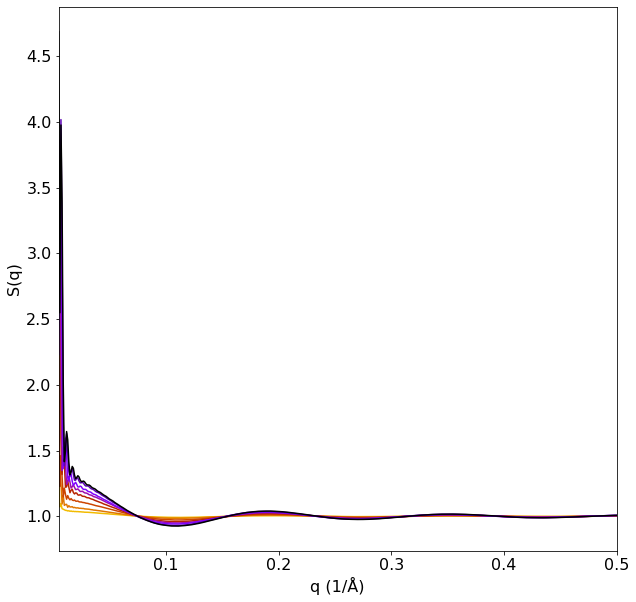

In [10]:
%cd -q $workdir
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series4mix"
structure = "open"

if series=="series4mix":
    conc_range = [0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01] 
    Mw1 = 30218.99
    Mw2 = 29609.61
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200.aam"
        macromolecule2 = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697.aam"
        macromolecule2 = "../1ein_open.aam"

if series=="series3_R20mix":
    conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73] 
    Mw1 = 31881.54
    Mw2 = 31272.17
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200_R20.aam"
        macromolecule2 = "../1du4_R20.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697_R20.aam"
        macromolecule2 = "../1ein_R20.aam" 
        

for epsHH_kT in [0.485]: 
    for eps_kT in [0.005]:
        for Cp in conc_range:
            pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
            %cd -q $pfx
            q,s = np.loadtxt("debye.dat",usecols=(0,1),unpack=True)
            plt.plot(q,s)
            plt.xlim(0.005,0.5)
            #plt.ylim(0.8, 1.6)
            plt.xlabel("q (1/Å)")
            plt.ylabel("S(q)")
                        
            %cd -q '..'
        
plt.savefig('sq-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight') 

%cd -q $workdir

## g(r)

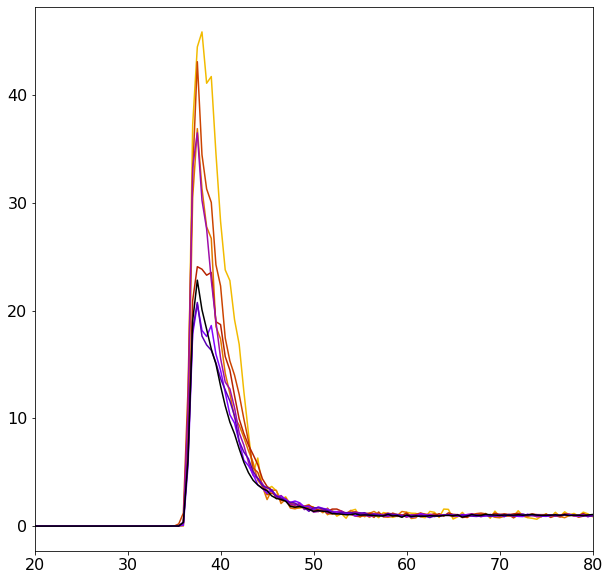

In [18]:
%cd -q $workdir
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series4mix"
structure = "open"


if series=="series4mix":
    conc_range = [0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01] 
    Mw1 = 30218.99
    Mw2 = 29609.61
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200.aam"
        macromolecule2 = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697.aam"
        macromolecule2 = "../1ein_open.aam"

if series=="series3_R20mix":
    conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73] 
    Mw1 = 31881.54
    Mw2 = 31272.17
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200_R20.aam"
        macromolecule2 = "../1du4_R20.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697_R20.aam"
        macromolecule2 = "../1ein_R20.aam" 


for epsHH_kT in [0.485]: 
    for eps_kT in [0.005]:
        for Cp in conc_range:
            pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
            %cd -q $pfx
            r,g = np.loadtxt("rdf.dat",usecols=(0,1),unpack=True)
            plt.plot(r,g)
            plt.xlim(20,80)
                        
            %cd -q '..'
        
plt.savefig('gr-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight') 
            
%cd -q $workdir

## Regression for S(0)

0.69 r2= 0.9939313081939253
1.51 r2= 0.9953101542739561
2.76 r2= 0.9934569102289067
3.81 r2= 0.995832552565118
5.84 r2= 0.9927646825473548
6.81 r2= 0.9879453379986681
6.73 r2= 0.9906299069308928


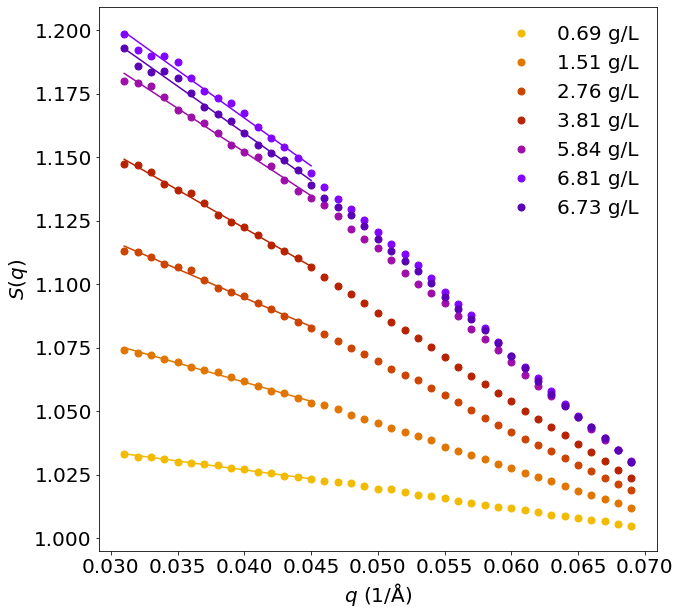

In [9]:
%cd -q $workdir
from scipy import stats
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series3_R20mix"
structure = "open"


if series=="series4mix":
    conc_range = [0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01] 
    Mw1 = 30218.99
    Mw2 = 29609.61
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200.aam"
        macromolecule2 = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697.aam"
        macromolecule2 = "../1ein_open.aam"

if series=="series3_R20mix":
    conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73] 
    Mw1 = 31881.54
    Mw2 = 31272.17
    if structure=="closed":
        macromolecule1 = "../SPIRR-closed-frame200_R20.aam"
        macromolecule2 = "../1du4_R20.aam"
    elif structure=="open":
        macromolecule1 = "../SPIRR-open-frame697_R20.aam"
        macromolecule2 = "../1ein_R20.aam" 
        
        
l1 = [0.485]
l2 = [0.005]

for epsHH_kT in l1: 
    for eps_kT in l2:
        conclist = []
        invs0list = []
        for Cp in conc_range:
            q_range = []
            s_range = []
            s_linreg = []
            pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
            %cd -q $pfx
            q0,s0 = np.loadtxt("debye.dat",usecols=(0,1), unpack=True, skiprows=1)
            for i in np.arange(0,len(q0)):
                if q0[i] < 0.07 and q0[i] > 0.03:
                    q_range.append(q0[i])
                    s_range.append(s0[i])

            plt.plot(q_range, s_range, ms=7, marker='o',ls='None',label=str(Cp)+" g/L")

            %cd -q '..'

        plt.gca().set_prop_cycle(None)
        plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
              

for epsHH_kT in l1: 
    for eps_kT in l2:
        interceptlist = []
        conclist = []
        invs0list = []
        for Cp in conc_range:
            q_range = []
            s_range = []
            s_linreg = []
            pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
            %cd -q $pfx
            q0,s0 = np.loadtxt("debye.dat",usecols=(0,1),unpack=True)
            for i in np.arange(0,len(q0)):
                if q0[i] < 0.046 and q0[i] > 0.03:      #0.03-0.046 Guinier region (plutot 0.03-0.07?)
                    q_range.append(q0[i])
                    s_range.append(s0[i])

            slope, intercept, r_value, p_value, std_err = stats.linregress(q_range,s_range)
            interceptlist.append(intercept)
            invs0list.append(1/intercept)
            conclist.append(Cp)
            print(Cp, "r2=", r_value**2)
            for j in np.arange(0,len(q_range)):
                s_linreg.append(q_range[j]*float(slope)+float(intercept))

            plt.plot(q_range, s_linreg,ls='-',marker='None', lw=1.5)
            plt.xlabel("$q$ (1/Å)", size=20)
            plt.ylabel("$S(q)$", size=20)
            plt.tick_params(axis='both', which='major', labelsize=20)
            #plt.title("TLL, open, "+r"$\varepsilon_{LJ} = 0.005 kT$"+", "+r"$\varepsilon_{H-H} = 0.485 kT$",size=20,y=1.02)
            plt.legend(frameon=False, fontsize=20)

            %cd -q '..'

        np.savetxt(str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'_intercepts.dat',np.transpose((conclist,invs0list)))
        plt.savefig('reg-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight') 

%cd -q $workdir

inferior to 1? -0.030722817197414928
slope = -0.030722817197414928
A2 = -5.124699459836637e-07
B2 raw = -7.646148713350809e-22
B2 HS = 3.5998382595162327e-22
-----------------------------------
B2 norm. = -2.1240256261897565
B2 exp. is : -6.25
B2 exp.2 is : -6.242570675471828


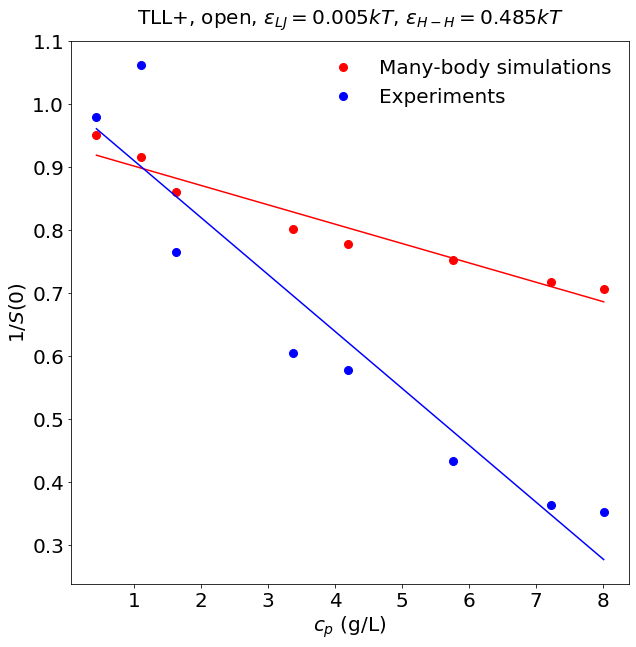

In [37]:
from scipy import stats

%cd -q $workdir


series = "series4mix"
structure = "open"
epsHH_kT = 0.485
eps_kT = 0.005


if series=="series4mix":
    conc_range = [0.44, 1.10, 1.62, 3.38, 4.19, 5.76, 7.22, 8.01] 
    Mw1 = 30218.99
    Mw2 = 29609.61
    expe = -6.25
    expdata = "s0_exp_series4.dat"

if series=="series3_R20mix":
    conc_range = [0.69, 1.51, 2.76, 3.81, 5.84, 6.81, 6.73] 
    Mw1 = 31881.54
    Mw2 = 31272.17
    expe = -6.12
    expdata = "s0_exp_series3.dat"

    
cnctr,intrc = np.loadtxt(str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'_intercepts.dat', usecols=(0,1),unpack=True)
conc_s0, invs0_exp, s0_exp = np.loadtxt(expdata, usecols=(0,1,2),unpack=True)

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(cnctr,intrc)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(conc_s0,invs0_exp)

plt.plot(cnctr,intrc,'ro', ms=8,label="Many-body simulations")
plt.plot(cnctr,cnctr*slope1+intercept1,'r-',lw=1.5)
plt.title("TLL+, open, "+r"$\varepsilon_{LJ} = 0.005 kT$"+", "+r"$\varepsilon_{H-H} = 0.485 kT$",size=20,y=1.02)
plt.plot(conc_s0,invs0_exp,'bo', ms=8,label="Experiments")
plt.plot(conc_s0,conc_s0*slope2+intercept2,'b-',lw=1.5)

plt.xlabel("$c_p$ (g/L)", size=20)
plt.ylabel("$1/S(0)$", size=20)
plt.legend(frameon=False, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

N_A = 6.02214129*1e+23

Mw = (0.6*Mw1 + 0.4*Mw2)

A2 = slope1/(2*Mw)
B2_raw = A2 * Mw**2 / N_A
B2_HS = 2 * math.pi * (27.8*(10**-9)*2)**3 / 3
B2_norm = B2_raw / B2_HS

A2_exp = slope2/(2*Mw)
B2_raw_exp = A2_exp * Mw**2 / N_A
B2_HS_exp = 2 * math.pi * (27.8*(10**-9)*2)**3 / 3
B2_norm_exp = B2_raw_exp / B2_HS_exp

print("inferior to 1?", 2*Mw*A2)
print("slope =", slope1)
print("A2 =", A2)
print("B2 raw =", B2_raw)
print("B2 HS =", B2_HS)
print("-----------------------------------")
print("B2 norm. =", B2_norm)

print("B2 exp. is :", expe)
print("B2 exp.2 is :", B2_norm_exp)


plt.savefig('b2fromsq-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight')

%cd -q $workdir

## Get stuff out of the output files

In [ ]:
num = "Excess pressure"
fileHandle = open ("tll.out","r" )                          # Read the output file
lineList = fileHandle.readlines()
fileHandle.close()
linenr = sum(1 for _ in lineList)                       # Number of lines in the file
for i in np.arange(0,linenr-1,1):                       # Loops through the file
    if str(num) in lineList[i]:                         # If text "Averages" is on a line...
        q = lineList[i]                                 # Keep this line...
        lineparts = q.split()                           # And cut it in columns...
        excpress = lineparts[5]                         # And take column 5 (excess pressure)